In [60]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
import re
from collections import Counter
from wordcloud import WordCloud

In [61]:
df = pd.read_csv("QVI_purchase_behaviour.csv")
df

LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]

In [62]:
df2 = pd.read_excel("QVI_transaction_data.xlsx")
df2

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[264836 rows x 8 columns]

from above we noticed that the date format is not one we use universally, as such we need to convert the date integer to one we're familiar with
- the function below converts number like(43385) into a real calender date like (2020-01-01)
- Checks if the input is a number (integer or float).
- Converts the origin date (default "1899-12-30") into a date object.
- Adds the number of days to the origin date using timedelta.
- Returns the calculated date.

In [63]:
def integer_to_date(integer_date, origin="1899-12-30"):
    if isinstance(integer_date, (int, float)):  # Ensure the value is a number
        origin_date = datetime.strptime(origin, "%Y-%m-%d")
        return origin_date + timedelta(days=int(integer_date))
    return integer_date

In [64]:
df2['DATE'] = df2['DATE'].apply(integer_to_date)
df2

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
...                                          ...       ...        ...  
264831   Kettle Sweet Chilli And Sour Cream 175g         2       10.8  
264832             Tostitos Splash Of  Lime 175g         1        4.4  
264833                  Doritos Mexicana    170g         2        8.8  
264834   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8  
264835             Tostitos Splash Of  Lime 175g         2        8.8  

[264836 rows x 8 columns]

# EDA Exploratory Data Analysis

In [65]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00,  4.99it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [66]:
profile2 = ProfileReport(df2)
profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00,  9.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

from the analysis above it seems that there is a duplicate we need to delete.drop

In [67]:
df2 = df2.drop_duplicates()

I then converted the excel sheet into a csv in preparation for merging

In [68]:
df2.to_csv("QVI_transaction_data.csv", index=False)

I then used an inner join to merge the two csv files in preparation for analysis. The merged csv is then stored into a variable called merged_df

In [69]:
merged_df = pd.merge(df2, df, on = 'LYLTY_CARD_NBR', how ='inner')

In [70]:
merged_df

DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264830 2019-03-09        272          272319  270088        89   
264831 2018-08-13        272          272358  270154        74   
264832 2018-11-06        272          272379  270187        51   
264833 2018-12-27        272          272379  270188        42   
264834 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3         Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   
...                                          ...       ...        ...   
264830   Kettle Sweet Chilli And Sour Cream 175g         2       10.8   
264831             Tostitos Splash Of  Lime 175g         1        4.4   
264832                  Doritos Mexicana    170g         2        8.8   
264833   Doritos Corn Chip Mexican Jalapeno 150g         2        7.8   
264834             Tostitos Splash Of  Lime 175g         2        8.8   

                     LIFESTAGE PREMIUM_CUSTOMER  
0        YOUNG SINGLES/COUPLES          Premium  
1       MIDAGE SINGLES/COUPLES           Budget  
2       MIDAGE SINGLES/COUPLES           Budget  
3       MIDAGE SINGLES/COUPLES           Budget  
4       MIDAGE SINGLES/COUPLES           Budget  
...                        ...              ...  
264830   YOUNG SINGLES/COUPLES          Premium  
264831   YOUNG SINGLES/COUPLES          Premium  
264832   YOUNG SINGLES/COUPLES          Premium  
264833   YOUNG SINGLES/COUPLES          Premium  
264834   YOUNG SINGLES/COUPLES          Premium  

[264835 rows x 10 columns]

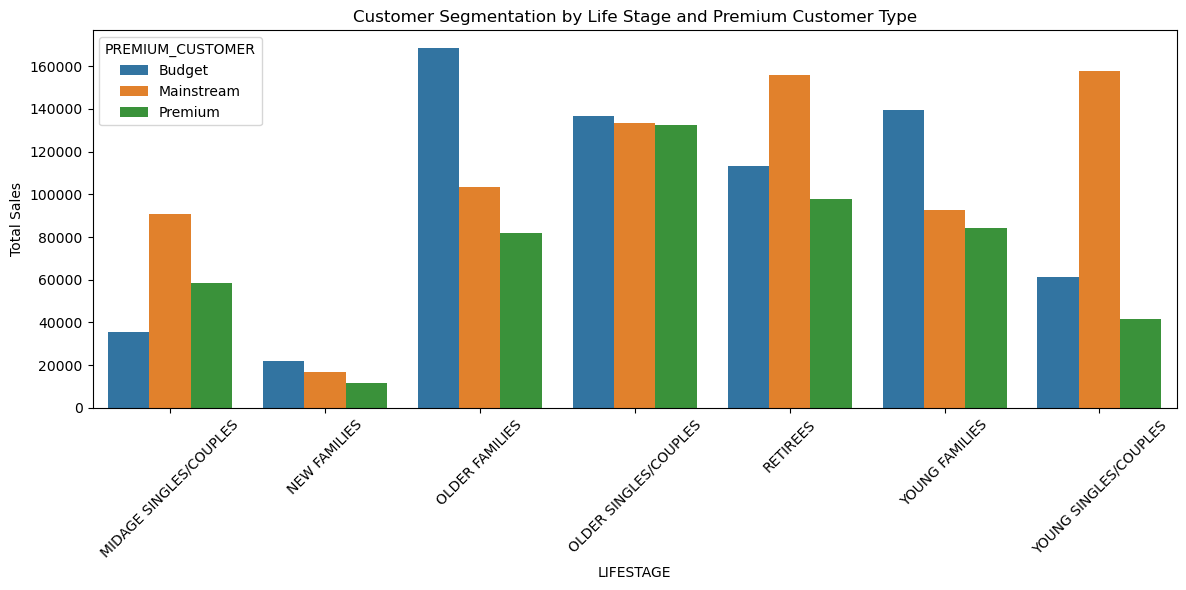

In [71]:
%matplotlib inline

segmentation = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=segmentation, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')

plt.title('Customer Segmentation by Life Stage and Premium Customer Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

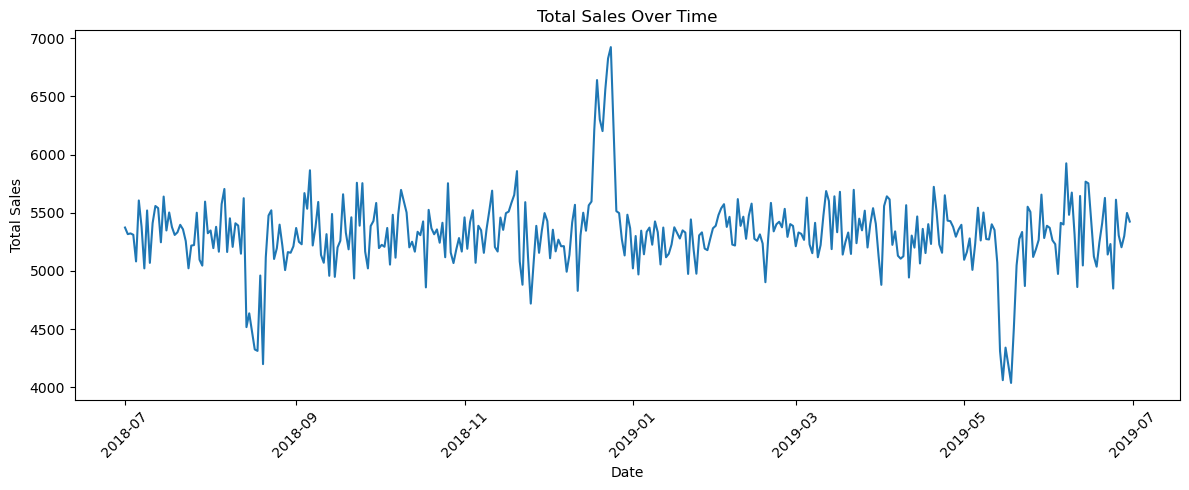

In [72]:
sales_by_date = merged_df.groupby('DATE')['TOT_SALES'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=sales_by_date, x='DATE', y='TOT_SALES')
plt.title('Total Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Now we want to perform a word cloudthat tells us which products produce the most sales

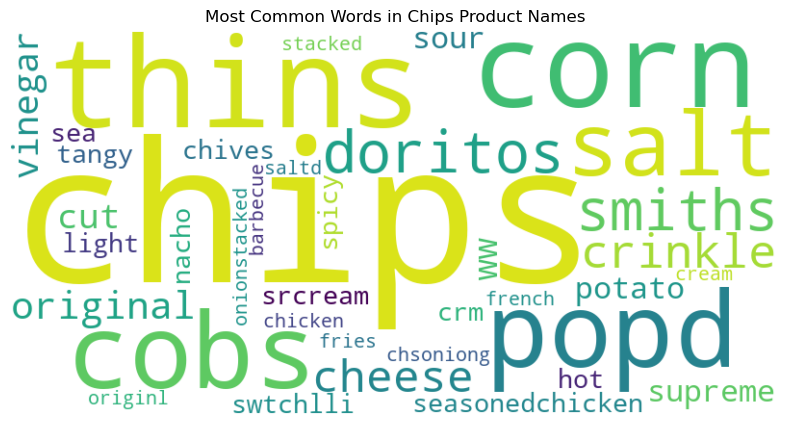

In [79]:

product_series = merged_df['PROD_NAME'].dropna().astype(str)

# Filter out only rows that likely contain "chips" and exclude "salsa"
chips_only = product_series[product_series.str.contains("chips", case=False)]
chips_only = chips_only[~chips_only.str.contains("salsa", case=False)]

# Remove digits and special characters, keep only letters and spaces
cleaned = chips_only.str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Tokenize (split) into words and flatten the list
words = cleaned.str.lower().str.split().explode()

# Optional: remove common stopwords if needed
stopwords = set(['and', 'the', 'with', 'for', 'from', 'g']) 
words = words[~words.isin(stopwords)]

#Count frequency
word_counts = Counter(words)

#Sort by frequency (highest to lowest)
sorted_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_words)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Chips Product Names')
plt.show()
